In [1]:
import numpy as np
from data import generate_radial_mesh, generate_rectangle, insert_shape, plot_data, plot_shape_data
from agent import Agent

%load_ext autoreload
%autoreload 2

No GPU/TPU found, falling back to CPU. (Set TF_CPP_MIN_LOG_LEVEL=0 and rerun for more info.)


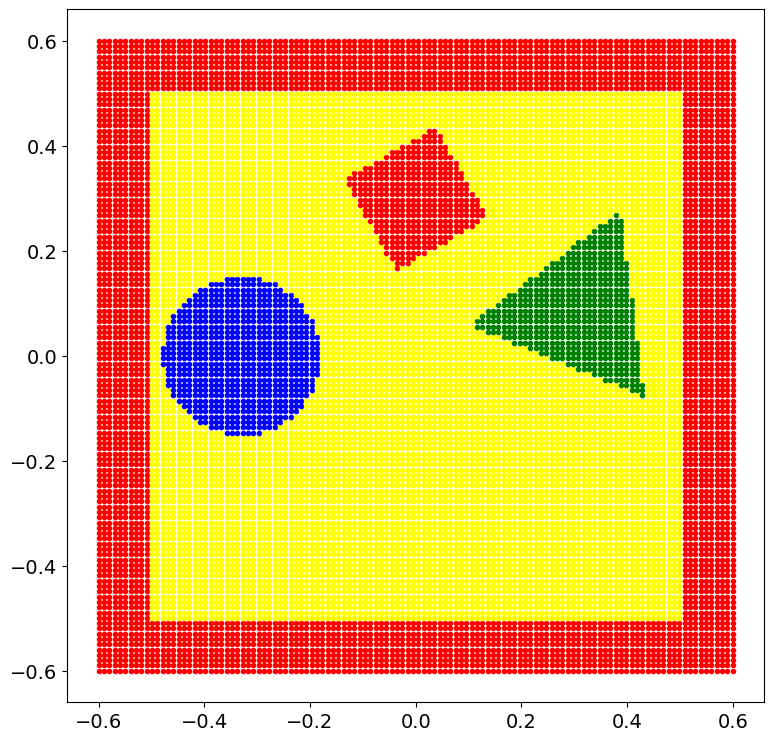

In [2]:
'''
inner, boundary = generate_radial_mesh(radius=0.8, density=33, boundary_pct=0.25)
temp_grid = np.vstack((inner[0], boundary[0]))
temp_obs_dict = {tuple(x) : 0 for x in inner[0]} | {tuple(x) : 1 for x in boundary[0]} 
plot_data(temp_grid, temp_obs_dict)
'''

grid, obs_dict = generate_rectangle(height=1, width=1, density=1e4, unsafe_margin=0.2, center=(0,0))
obs_dict = insert_shape(np.array([-0.33, 0]), grid, obs_dict, shape='circle', scale=0.15)
obs_dict = insert_shape(np.array([0.25, 0.16]), grid, obs_dict, shape='triangle', scale=0.3, theta=-np.pi/8)
obs_dict = insert_shape(np.array([0, 0.30]), grid, obs_dict, shape='rhombus', scale=0.10, theta=np.pi/6)
plot_shape_data(grid, obs_dict)

position is [0 0]
time is 0


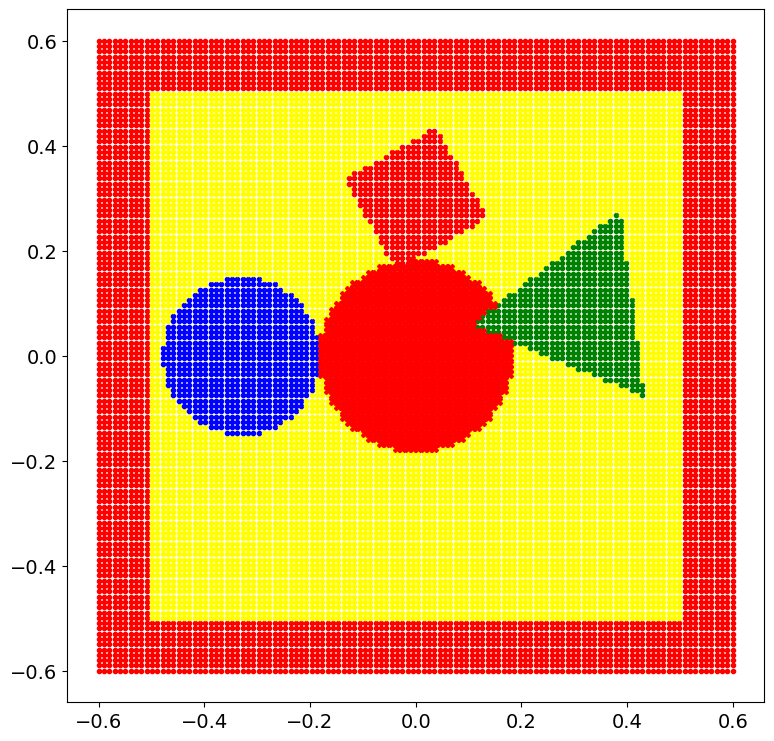

(983, 2)
491
(738, 2)
369


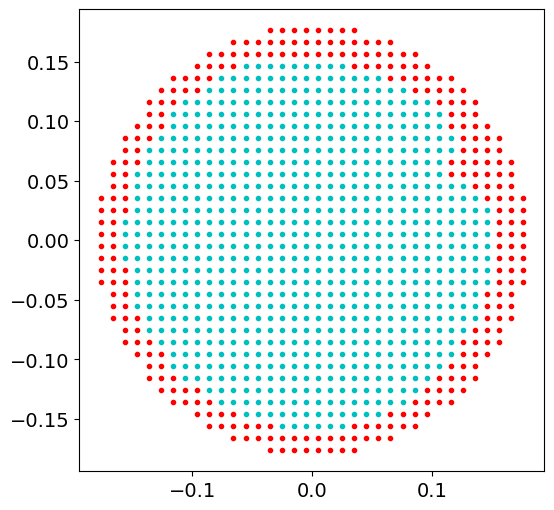

new position is [0 0]
new time is 0
using norm trick
using norm trick


ValueError: shapes (0,) and (2,8) not aligned: 0 (dim 0) != 2 (dim 0)

In [3]:
#agent = Agent((inner, boundary), verbose=False)
agent = Agent(grid, obs_dict, sensor_range=0.18, verbose=False)

In [ ]:
#%debug
for n in range(20):
    waypt = agent.get_waypoint(n_rays=100, eps=1e-3, scale=2)
    agent.traverse(t_end=5, info_mpc=True, mpc=False, track_control=False, steps=50, horizon=5, waypt=waypt)
    agent.scan(plot=True)
    agent.train(verbose=False)

In [ ]:
for n in range(20):
    waypt = agent.get_waypoint(n_rays=100, eps=1e-4, scale=2)
    agent.traverse(t_end=5, info_mpc=True, mpc=False, track_control=False, steps=50, horizon=10, waypt=waypt)
    agent.scan(plot=True)
    agent.train(verbose=False)